In [1]:
import numpy as np
import scipy.stats as ss
from numpy import Inf
import matplotlib.pyplot as plt
import sys
import pyEXP
##  exp
sys.path.append("/u/svarel/exp/build/utils/Analysis/")
from spherical_basis_builder import *
#import simpleSL

## Auriga
import LibAu as la

In [2]:
from scipy.stats import binned_statistic_2d, binned_statistic
def StellarDensity2D(x,y,weights,minMax=None,statistic='sum',npix = [250,250],style='SB'):
    if minMax==None: minMax=[ min([min(x),min(y)]),max([max(x),max(y)]) ]
        
    grid, _x, _y, _ = binned_statistic_2d(x, y, weights, statistic, bins=npix)#, range=[minMax,minMax])
    box=np.abs(_x[1]-_x[0])#k['box']
    #minMax = [0, 1]
    
    if style=='normal': return grid,box
    if statistic=='sum':
        
        if style=='SB':
            #box_arcsec = np.rad2deg(np.arctan(box*1000/10))*(60*60)
            box_arcsec = (box*1000/10)*((180*60*60)/np.pi)
            return grid / box_arcsec**2,_x,_y,box
        if style=='SD':
            return grid / box**2,_x,_y,box
    if statistic!='sum':
        print('statistic i not sum')
        raise SystemExit

In [3]:
nhalo=21 #Name Halo
nsnap= 63 #z=0
sim = la.Reader_Au(Nhalo=nhalo,Nsnap=nsnap) #Read Simulation
header = sim.Header()
h=header['hubbleparam']
sc=header['time']

Rvir =sim.sf.data['frc2'][0]*1000*sc/h
Mvir =sim.sf.data['fmc2'][0]*1e10/h
Npart = sim.sf.data['slty'][0]
print(Mvir,Rvir,Npart)

fields_stars = ['pos','vel','id','mass','type','pot','age']
Datstars = sim.Snapshot_Subhalo(idSubhalo=0,snapType='stars',fields=fields_stars)


fields_dm = ['pos','vel','id','mass','type','pot']
DatDM = sim.Snapshot_Subhalo(idSubhalo=0,snapType='dm1',fields=fields_dm)
#Rotate Halo
'''Data = {'stars':Datstars,'dm1':DatDM}
param = {'spos':sim.sf.data['spos'][0,:],'svel':sim.sf.data['svel'][0,:],'header':sim.Header()}
gal = la.ToolRot(Data=Data, param=param)
Data = gal.Rotate()

Datstars=Data['stars']
DatDM = Data['dm1']

potdm = DatDM['pot']
pos = DatDM['pos'] #part_rot[not_in_subs]
mass = DatDM['mass']  #part['dark']['mass'][not_in_subs]

poss,masss=Datstars['pos'],Datstars['mass']'''

2088654433553.4023 349.25210558595916 [11792260 31503466        0        0 19107866        1]


/u/svarel/.local/lib/python3.6/site-packages/cosmological_factors.py:100: RuntimeWarning: invalid value encountered in sqrt
  var2 = np.sqrt(self.OmegaLambda / self.OmegaMatter * a**3.0)


"Data = {'stars':Datstars,'dm1':DatDM}\nparam = {'spos':sim.sf.data['spos'][0,:],'svel':sim.sf.data['svel'][0,:],'header':sim.Header()}\ngal = la.ToolRot(Data=Data, param=param)\nData = gal.Rotate()\n\nDatstars=Data['stars']\nDatDM = Data['dm1']\n\npotdm = DatDM['pot']\npos = DatDM['pos'] #part_rot[not_in_subs]\nmass = DatDM['mass']  #part['dark']['mass'][not_in_subs]\n\nposs,masss=Datstars['pos'],Datstars['mass']"

In [4]:
path = lambda i,j,k: '/virgotng/mpa/Auriga/level3/Original/halo_'+str(i)+'/output/snapdir_'+'%.3i'% j+'/snapshot_'+'%.3i'% j+'.'+str(k)+'.hdf5'
obj = np.arange(0,8,1)

In [5]:
import h5py
X,Y,Z,M = np.array([]),np.array([]),np.array([]),np.array([])
NDM1part=0
#X2,Y2,Z2,M2 = np.array([]),np.array([]),np.array([]),np.array([])
pathg = lambda i,j,k: '/virgotng/mpa/Auriga/level3/Original/halo_'+str(i)+'/output/groups_'+'%.3i'% j+'/fof_subhalo_tab_'+'%.3i'% j+'.'+str(k)+'.hdf5'
for s in range(0,32):
    print(path(nhalo,nsnap,s))
    part= h5py.File(path(nhalo,nsnap,s),'r')
    fof= h5py.File(pathg(nhalo,nsnap,s),'r')
    #print(part['PartType2'].keys())
    #print(part['PartType2/Coordinates'].shape)
    dat1 = part['PartType1']
    dat = part['PartType2']
    #print(part.keys())
    #print(part['PartType1'].keys())
    #print(fof.keys())
    #print(fof['Subhalo/SubhaloLenType'][()])
    if s==0:NDM1part=fof['Subhalo/SubhaloLenType'][()][0][1]
    #if s==5:break
    #continue
    x = dat1['Coordinates'][:,0]#/h
    y = dat1['Coordinates'][:,1]#/h
    z = dat1['Coordinates'][:,2]#/h
    #m = dat1['Masses'][()]*1e10#/h
    
    X = np.concatenate([X,x])
    Y = np.concatenate([Y,y])
    Z = np.concatenate([Z,z])
    #M = np.concatenate([M,m])
    continue
    H,_x,_y,box = StellarDensity2D(X,Y,np.ones_like(X),npix = [700,700],style='SD')
    ax1=plt.figure(figsize=(15,15))
    ax=plt.subplot(1,1,1)
    ax.patch.set_facecolor('black')
    extent = _x.min(),_x.max(),_y.min(),_y.max()
    plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')
    #plt.scatter(X[0],Y[0],marker='o',s=50)
    plt.show()
    plt.close()
    if s==5:break
    '''
    x = dat['Coordinates'][:,0]#/h
    y = dat['Coordinates'][:,1]#/h
    z = dat['Coordinates'][:,2]#/h
    m = dat['Masses'][()]*1e10#/h
    
    X2 = np.concatenate([X2,x])
    Y2 = np.concatenate([Y2,y])
    Z2 = np.concatenate([Z2,z])
    M2 = np.concatenate([M2,m])
    '''


/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.0.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.1.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.2.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.3.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.4.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.5.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.6.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.7.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.8.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.9.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_063.10.hdf5
/virgotng/mpa/Auriga/level3/Original/halo_21/output/snapdir_063/snapshot_06

In [6]:
DatDM['pos'].shape, X[:NDM1part].shape

((31503466, 3), (31503466,))

/u/svarel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


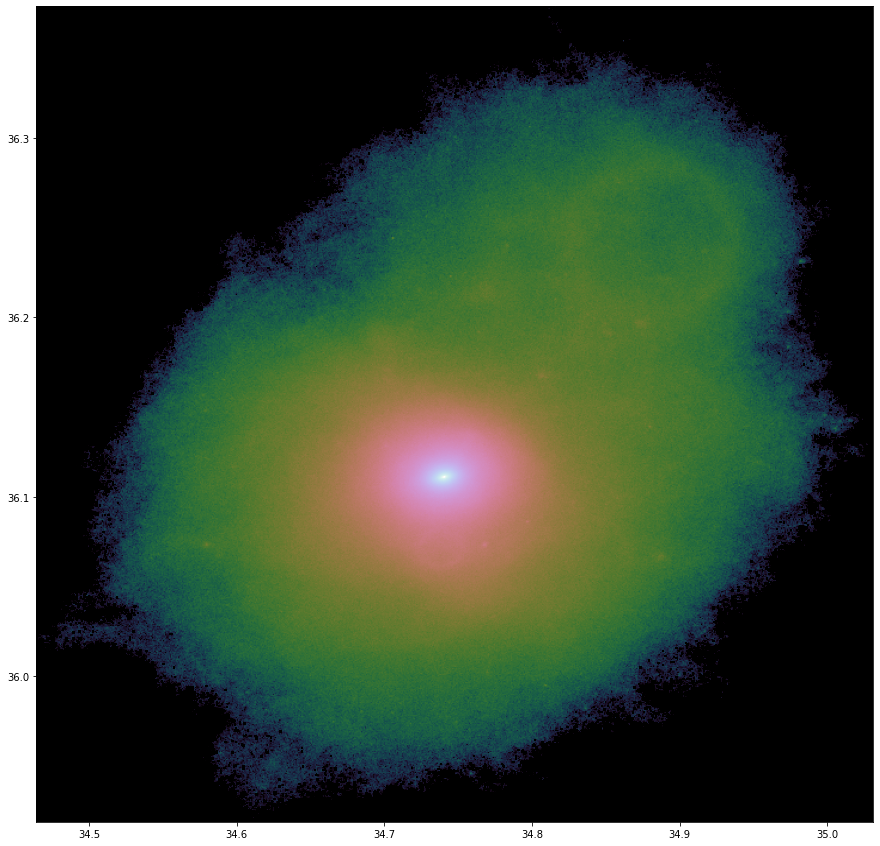

In [7]:
H,_x,_y,box = StellarDensity2D(X[:NDM1part],Y[:NDM1part],np.ones_like(X[:NDM1part]),npix = [700,700],style='SD')
ax1=plt.figure(figsize=(15,15))
ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
extent = _x.min(),_x.max(),_y.min(),_y.max()
plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')
#plt.scatter(X[0],Y[0],marker='o',s=50)

/u/svarel/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: RuntimeWarning: divide by zero encountered in log10
  


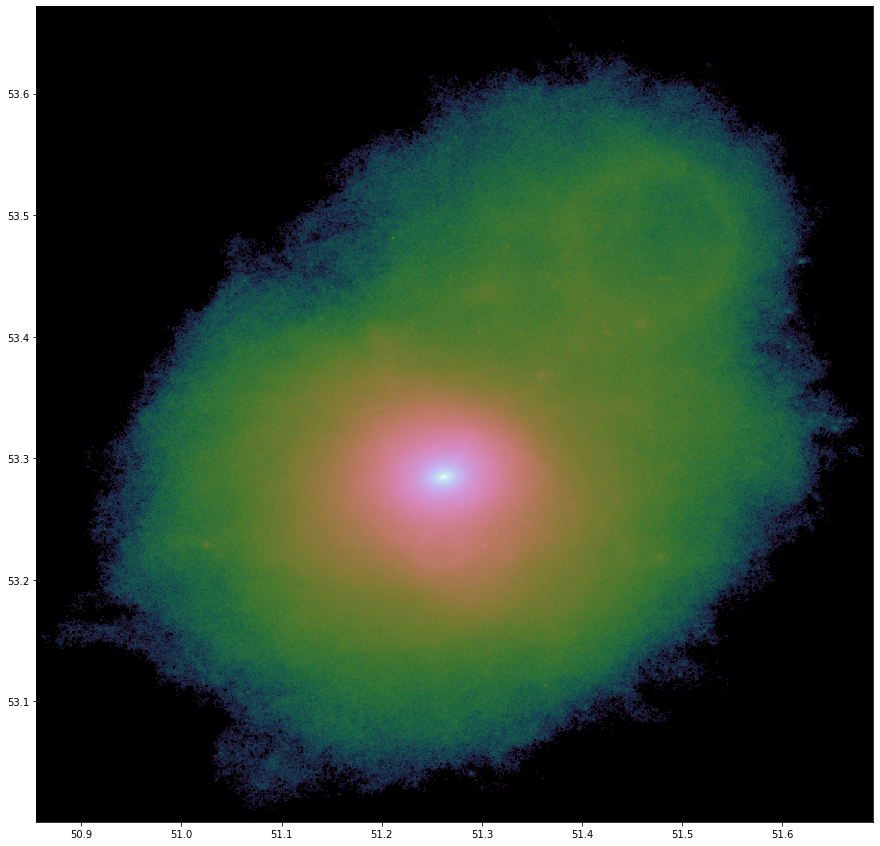

In [8]:
H,_x,_y,box = StellarDensity2D(DatDM['pos'][:,0],DatDM['pos'][:,1],np.ones_like(DatDM['pos'][:,0]),npix = [700,700],style='SD')
ax1=plt.figure(figsize=(15,15))
ax=plt.subplot(1,1,1)
ax.patch.set_facecolor('black')
extent = _x.min(),_x.max(),_y.min(),_y.max()
plt.imshow(np.log10(H),cmap='cubehelix',extent=extent,aspect='auto')
#plt.scatter(X[0],Y[0],marker='o',s=50)

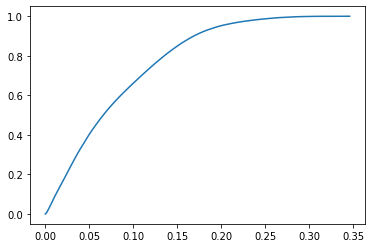

In [55]:
Mcum = np.cumsum(np.ones_like(X[:NDM1part]))
R3D = np.sqrt((X[:NDM1part]-X[:NDM1part][0])**2 + (Y[:NDM1part]-Y[:NDM1part][0])**2 + (Z[:NDM1part]-Z[:NDM1part][0])**2)
Rord = np.argsort(R3D)
R3D = R3D[Rord]
plt.plot(R3D,Mcum/Mcum[-1])

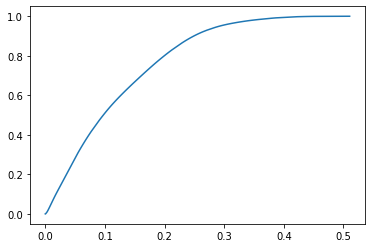

In [54]:
rr = np.sqrt(((DatDM['pos'][:,0]-DatDM['pos'][:,0][0])**2) + ((DatDM['pos'][:,1]-DatDM['pos'][:,1][0])**2) + ((DatDM['pos'][:,2]-DatDM['pos'][:,2][0])**2))
rrrord = np.argsort(rr)
mass = DatDM['mass']
mbacc = np.cumsum(np.float64(mass))
rr=rr[rrrord]
plt.plot(rr,mbacc/mbacc[-1])


In [29]:
rr.max(),R3D.max()*sc/h

(0.5103535, 0.5103542388992076)

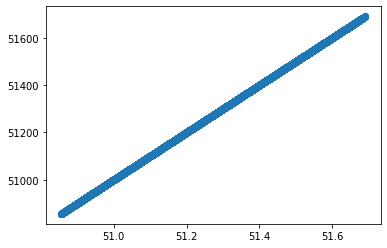

In [12]:
plt.scatter(DatDM['pos'][:,0],X[:NDM1part]*1000*sc/h)

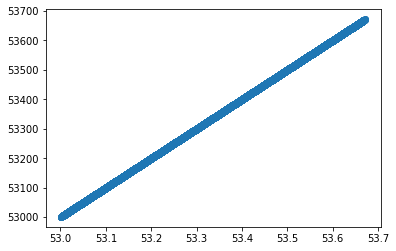

In [13]:
plt.scatter(DatDM['pos'][:,1],Y[:NDM1part]*1000*sc/h)

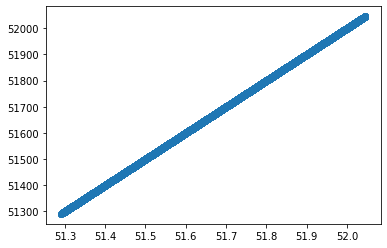

In [14]:
plt.scatter(DatDM['pos'][:,2],Z[:NDM1part]*1000*sc/h)

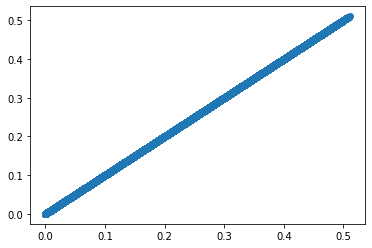

In [20]:
plt.scatter(rr,R3D*sc/h)

In [16]:
DatDM['pos'][:,0][0],DatDM['pos'][:,1][0],DatDM['pos'][:,2][0]

(51.337574, 53.328064, 51.56582)

In [19]:
X[:NDM1part][0]*sc/h,Y[:NDM1part][0]*sc/h,Z[:NDM1part][0]*sc/h

(51.33757324578998, 53.32806618037398, 51.56581901740549)

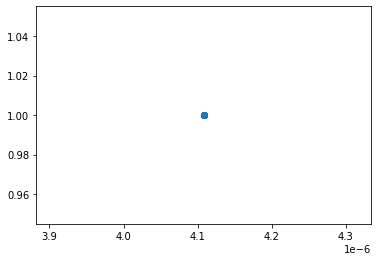

In [23]:

plt.scatter(mass,np.ones_like(X[:NDM1part]))

In [51]:
type(R3D[1000000]*sc/h),type(rr[1000000])

(numpy.float64, numpy.float32)

In [50]:
type(R3D),type(rr)

(numpy.ndarray, numpy.ndarray)

In [39]:
np.std(mass)

1.08227226e-10

In [41]:
np.sort(mass)

array([4.1083663e-06, 4.1083663e-06, 4.1083663e-06, ..., 4.1083663e-06,
       4.1083663e-06, 4.1083663e-06], dtype=float32)

In [45]:
mass.min(),mass.max()

(4.1083663e-06, 4.1083663e-06)